# Exercise 6 

## 6.a

Generate the set.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# for creating a responsive plot
%matplotlib inline

In [2]:
# Construct X matrix [1, x1, x2, x1*x2]
X = np.ones((200, 1))
X = np.append(X, np.random.uniform(low=0,high=10,size=(200,2)), axis=1)
X = np.append(X, (X[:,1] * X[:,2]).reshape(-1,1), axis=1)

# define theta
theta = np.array([[3, 2, 1, 1]])

# define normal error
n = np.random.normal(0,np.sqrt(0.05),len(X))

# Define y using only x1, x2
y = theta.dot(X.T) + n

#prin X and y
np.append(X[:,1:], y.reshape(-1,1), axis=1)[:5]

array([[ 3.17902621,  1.23782135,  3.93506652, 14.41493732],
       [ 3.93239446,  4.34573743, 17.08915378, 32.01851452],
       [ 9.65962238,  2.0651446 , 19.94851701, 44.31936188],
       [ 3.03617522,  0.79596378,  2.4166855 , 12.64137055],
       [ 1.58726582,  1.98523876,  3.15110162, 11.09764923]])

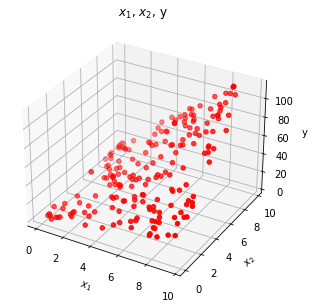

In [3]:
#plot X data
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],y,c='r',marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')
ax.set_title('$x_1$, $x_2$, y')
plt.show()

In [4]:
# For the rest we assume that we only know xi1, xi2 and yi
X_r = X[:,0:3]

## 6.b 

 Adopting the linear model assumption in the original space and the LS criterion, estimate the parameters of the model

 * Using the least squares method, assuming that the relation is linear, we can calculate:

In [5]:
Xx_inv = np.linalg.inv(X_r.T.dot(X_r))

Xy = X_r.T.dot(y.T)

# Finally
theta_r = Xx_inv.dot(Xy)
print(theta_r.flatten())

[-20.81711347   6.71265961   5.99903766]


## 6.c

For each one of the 200 data points $x_i$ of 𝑋, determine the associated estimate 𝑦̂𝑖 provided from the model estimated in (b) and compute the MSE

In [6]:
y_hat = theta_r.T.dot(X_r.T)

MSE = np.power((y-y_hat), 2).mean()
print(f"The MSE is {MSE}")

The MSE is 82.32176609421839


## 6.d

* We will now use our original data since we need x1, x2 and x1*x2. Let's see the first 5 rows

In [7]:
X[:5, 1:]

array([[ 3.17902621,  1.23782135,  3.93506652],
       [ 3.93239446,  4.34573743, 17.08915378],
       [ 9.65962238,  2.0651446 , 19.94851701],
       [ 3.03617522,  0.79596378,  2.4166855 ],
       [ 1.58726582,  1.98523876,  3.15110162]])

## 6.e

 Adopting the linear model assumption in the original space and the LS criterion, estimate the parameters of the model

 * Using the least squares method, assuming that the relation is linear, we can calculate:

In [8]:
Xx_inv_3 = np.linalg.inv(X.T.dot(X))

Xy_3 = X.T.dot(y.T)

# Finally
theta_r_3 = Xx_inv_3.dot(Xy_3)
print(theta_r_3.flatten())

[2.89605155 2.01815    1.01742978 0.99736414]


## 6.f

For each one of the 200 data points 𝒙𝑖 of 𝑋, determine the associated estimate 𝑦̂𝑖 provided from the model estimated in (b) and compute the MSE

In [9]:
y_hat_3 = theta_r_3.T.dot(X.T)

MSE = np.power((y-y_hat_3), 2).mean()
print(f"The MSE is {MSE}")

The MSE is 0.04412455677594366


## 6.g

Having calculated y as a non-linear function of $x_1$ $x_2$ we initially found estimates of $\theta_0, \theta_1, \theta_2$ using the LS method. The results aren't promising, since $y$ is a non linear function and we tried to estimate it using a linear function $f_\theta(x)$, thus the very high MSE. In 6.f we applied the transformation, in which our data matched the original ones, and the estimate of $\theta$ are very close to the calculated ones. 

# Exercise 7

## 7.a

Generate the set and plot the points.

In [10]:
# Construct X matrix [1, x1, x2, x1*x2]
x_ones = np.ones((2000, 1))
x1 = np.random.uniform(low=-2,high=2,size=(2000,1))
x2 = np.random.uniform(low=-2,high=2,size=(2000,1))
X = np.concatenate((x_ones, x1, x2), axis=1)

# Classify the points based on x1^2 - x2^2 = 0, +1 if >= 0 else -1
y = np.where(np.power(x1,2) - np.power(x2,2) >= 0, +1, -1)

# print X and y
np.append(X[:,1:], y.reshape(-1,1), axis=1)[:5]

array([[ 0.7610215 , -0.2912994 ,  1.        ],
       [-0.94011821, -1.75415967, -1.        ],
       [-0.73488283,  1.20530662, -1.        ],
       [-0.39812191, -0.62127847, -1.        ],
       [ 1.56338613,  0.08112157,  1.        ]])

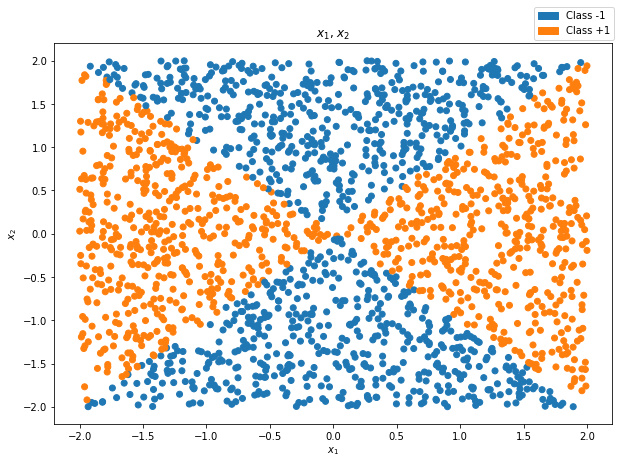

In [11]:
# define color pattern 
color = pd.Series(y.flatten()).apply(lambda x: 'C0' if x == -1 else 'C1')
# Create patches for the legend
patches = [ mpatches.Patch(color = 'C0', label = 'Class -1'), mpatches.Patch(color = 'C1', label = 'Class +1') ]


#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(X[:,1],X[:,2],c=color,marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$x_1$, $x_2$')
_ = ax.legend(handles = patches, \
            loc = 'upper left', bbox_to_anchor=(0.85, 0, 0, 1.11))

## 7.b 

Apply the transformation

In [12]:
X_new = np.power(X[:,1:], 2)

# print X and y
np.append(X_new, y, axis=1)[:5]

array([[ 0.57915372,  0.08485534,  1.        ],
       [ 0.88382225,  3.07707614, -1.        ],
       [ 0.54005277,  1.45276404, -1.        ],
       [ 0.15850105,  0.38598694, -1.        ],
       [ 2.44417621,  0.00658071,  1.        ]])

## 7.c 

Plot and comment

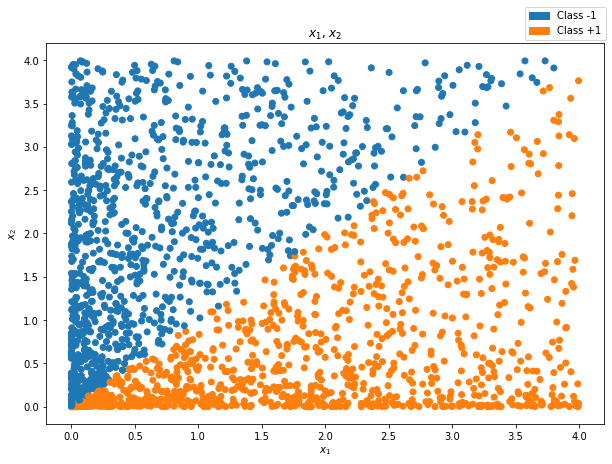

In [13]:

#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(X_new[:,0],X_new[:,1],c=color,marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$x_1$, $x_2$')
_ = ax.legend(handles = patches, \
            loc = 'upper left', bbox_to_anchor=(0.85, 0, 0, 1.11))

In the first case (before the transformation) our data was not linearly separable, which is obvious looking at Figure 2. When we applied the transformation our data became linearly separable. This happened because in the first case $y$ was a function of $x_1^2$ and $x_2^2$ (not linear) while in the second case it it a function of $\phi_1(x)_1$ and $\phi_2(x)$ (which is linear).

## 7.d

Estimate the parameters

In [14]:
# add ones to the transformed table for LS
X_new = np.append(x_ones, X_new, axis = 1)

# Performs LS
Xx_inv = np.linalg.inv(X_new.T.dot(X_new))
Xy = X_new.T.dot(y)

# Calculate and print coeff
theta = Xx_inv.dot(Xy)
print(theta)

[[ 0.00854722]
 [ 0.46595532]
 [-0.47635879]]


In [15]:
# Create points to plot 
lim = np.array([0,1,2,3,4])
line = - theta[0]/theta[2] - theta[1]/theta[2]*lim 

# add LS Sep.line patch
patches.append(mpatches.Patch(color = 'r', label = 'LS Sep. Line'))


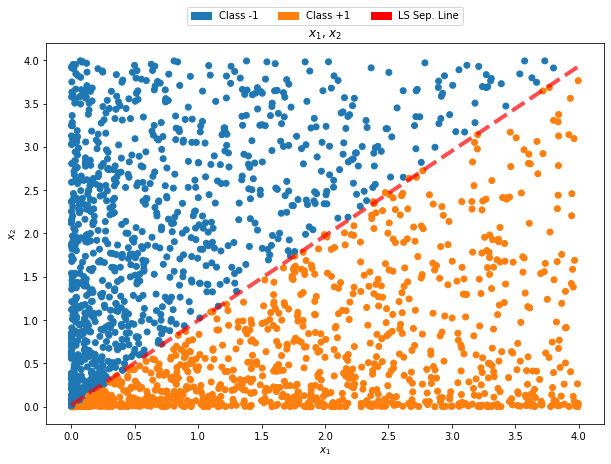

In [16]:

#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(X_new[:,1],X_new[:,2],c=color,marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$x_1$, $x_2$')
ax.plot(lim, line, linewidth=4, linestyle='--', color='r', alpha=0.7)
# ax.legend(bbox_to_anchor=(1.01, 0, 0, 1.1))
_ = ax.legend(handles = patches, \
            loc = 'upper center', bbox_to_anchor=(0.5, 0, 0, 1.11), ncol=3)

# Exercise 8

## 8.a

Generate the set and plot the points.

In [17]:
# Generate data
mean_1 = [0,0]
cov_1 = [[10,0],[0,10]]
mean_2 = [15,15]
cov_2 = [[1,0],[0,1]]

x1, x2 = np.random.multivariate_normal(mean_1,cov_1,1000), np.random.multivariate_normal(mean_2,cov_2,20)

X = np.concatenate((x1, x2))
y = np.append(np.full((1000,1), 1), np.full((20,1), -1))

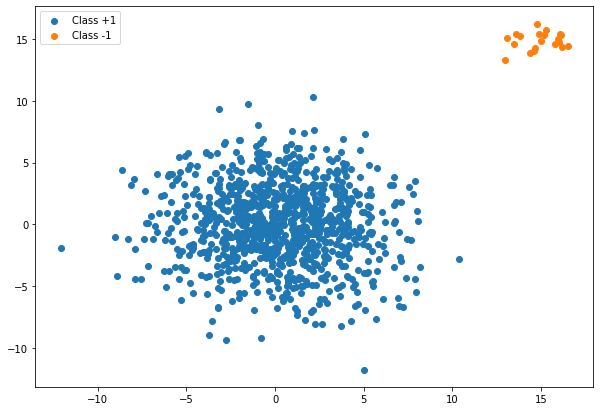

In [18]:
#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(X[:1000,0],X[:1000,1],c='C0',marker='o', label='Class +1')
ax.scatter(X[1000:,0],X[1000:,1],c='C1',marker='o', label='Class -1')
_ = ax.legend()

## 8.b 

Determine the sparating line.

In [19]:
# add ones to the transformed table for LS
X_new = np.append(np.ones((len(X),1)), X, axis = 1)

# Performs LS
Xx_inv = np.linalg.inv(X_new.T.dot(X_new))
Xy = X_new.T.dot(y)

# Calculate and print coeff
theta = Xx_inv.dot(Xy)
print(theta)

[ 0.9831993  -0.03183185 -0.03196898]


## 8.c

Plot the data points with the line

In [20]:
# Create points to plot 
lim = np.arange(np.amin(X[:]), np.amax(X[:]))
line = - theta[0]/theta[2] - theta[1]/theta[2]*lim 

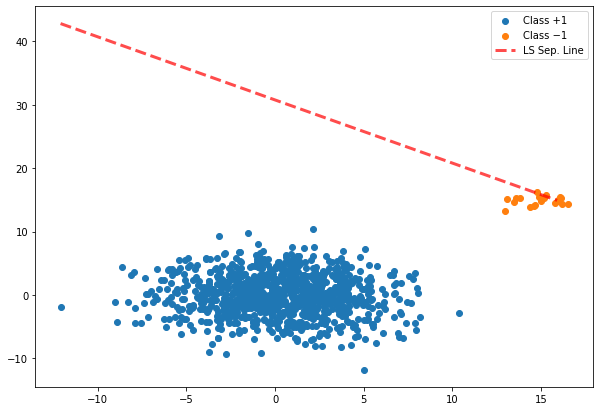

In [21]:
#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(X[:1000,0],X[:1000,1],c='C0',marker='o', label='Class +1')
ax.scatter(X[1000:,0],X[1000:,1],c='C1',marker='o', label='Class −1')
ax.plot(lim, line, linewidth=3, linestyle='--', color='r', label='LS Sep. Line', alpha=0.7)
_ = ax.legend()

## 8.d

Comment on the results

* As we can see the separating line does a bad job of separating the two classes. As we have seen in the lectures (Lecture 2 slides) this is caused by the imbalance in the number of points belonging to each class. Altought the points belonging in Class -1 have a bigger $J(\theta)$ the fact that there are much less points in this class, than those belonging in Class +1, means that they contribute less in the overall Cost Function. If we had even more points in Class +1, the line would be further away from the points. In that case the LS criterion would results in a larger value for "Class -1" points, but a smaller one overall.